## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")
from Plotting import Plotter
from label import label

In [2]:
import logging
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)

## Load Dataset

In [3]:
try:
    df = pd.read_csv('../data/data.csv')
except FileNotFoundError:
    print("csv file was not Found")
    logging.error("csv file was not Found")

## Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df = df.drop('Unnamed: 32', axis = 1)

## Visualization

In [8]:
vis =  Plotter()

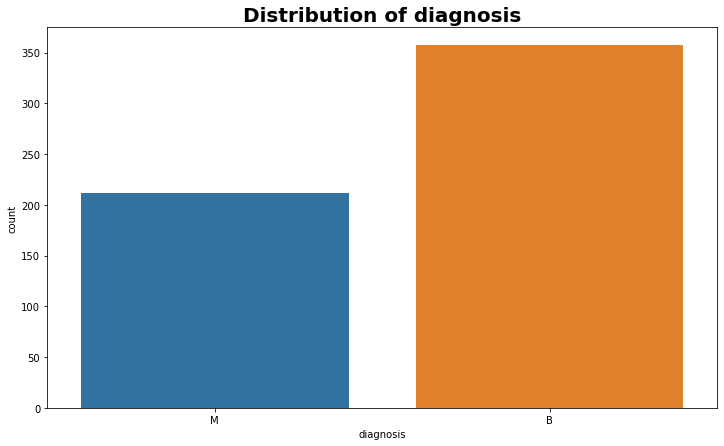

2021-08-26 06:18:43,966 plotted count plot for column diagnosis


In [9]:
vis.plot_count(df, 'diagnosis')
#plt.show()

<Figure size 864x504 with 0 Axes>

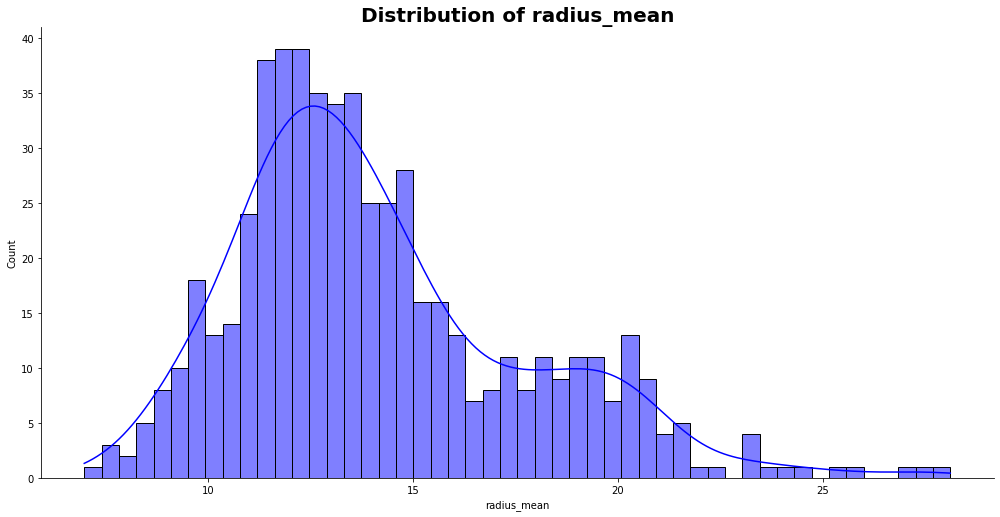

2021-08-26 06:18:47,067 plotted histogram for column radius_mean


In [10]:
vis.plot_hist(df, 'radius_mean', 'blue')

<Figure size 864x504 with 0 Axes>

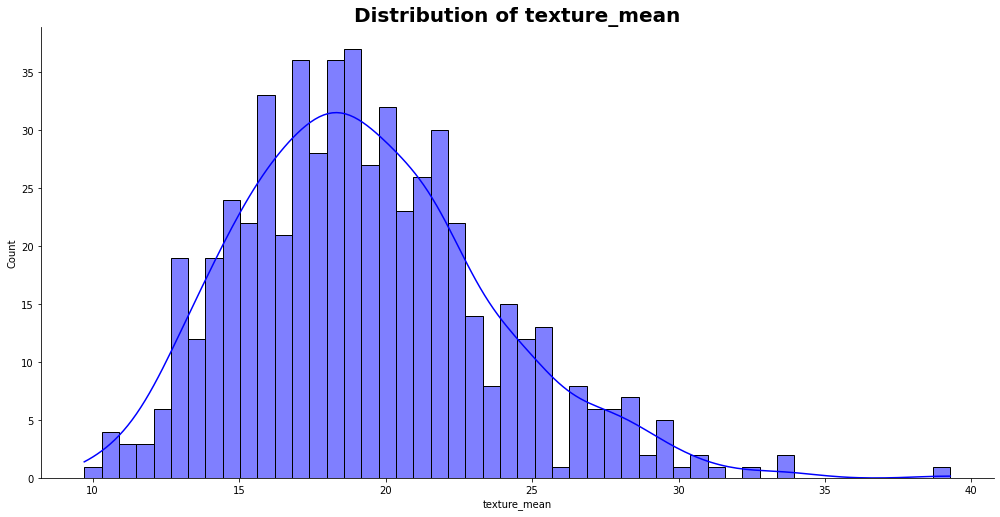

2021-08-26 06:18:49,577 plotted histogram for column texture_mean


In [11]:
vis.plot_hist(df, 'texture_mean', 'blue')

## Correlation

2021-08-26 06:18:50,278 plotted correlation matrix


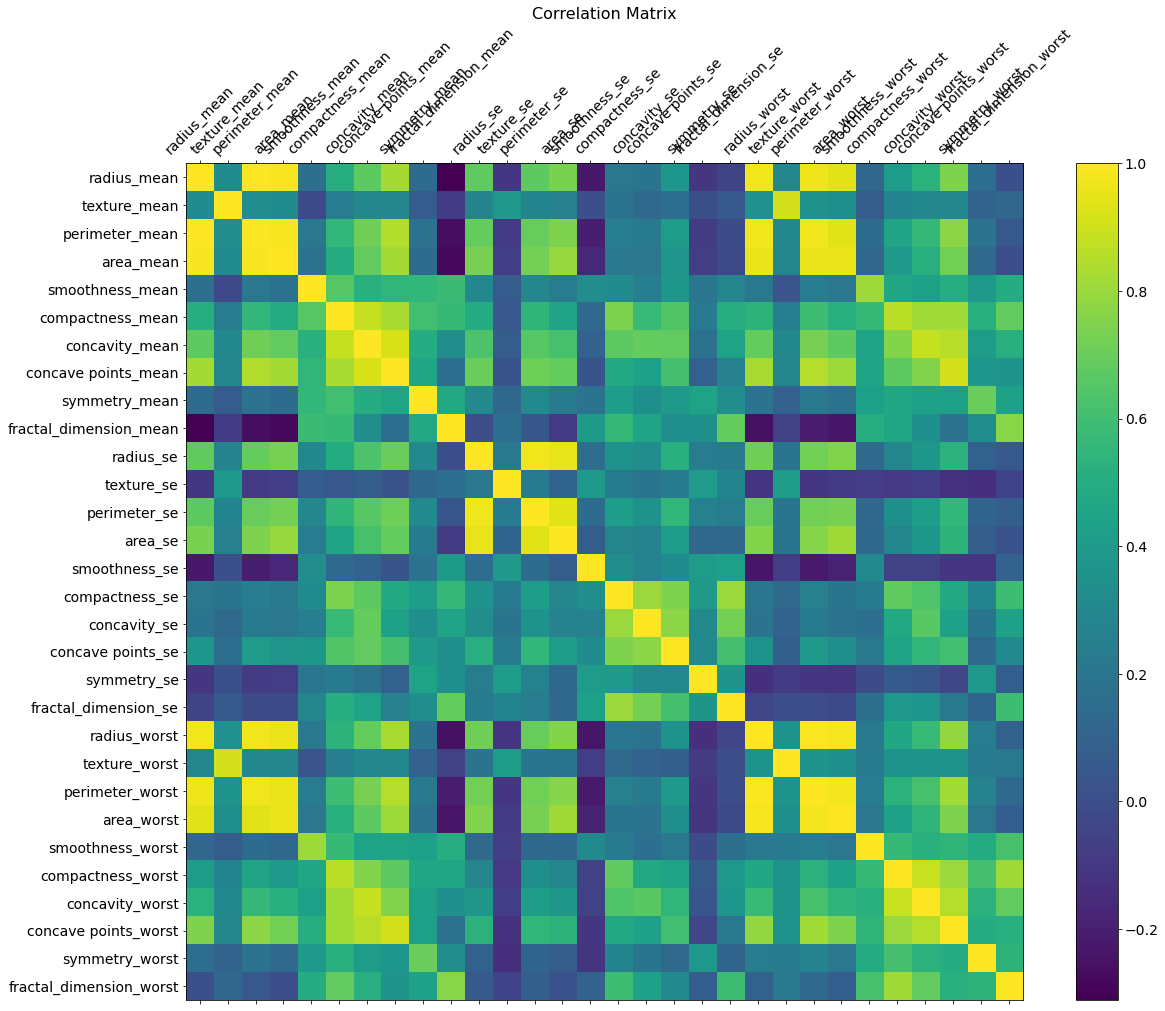

In [12]:
vis.plot_correlation(df.drop('id', axis = 1), "Correlation Matrix")

## Labeling

In [13]:
df['diagnosis'] = df['diagnosis'].apply(label)

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df[['id', 'diagnosis']].groupby('diagnosis').count()

,id
diagnosis,
0,357
1,212


## Prepare Training Set

In [16]:
X, y = df.drop(['id', 'diagnosis'], axis = 1), df['diagnosis']

## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(569, 30)

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

## Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
log_reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [20]:
log_reg.score(X_train, y_train)

0.990234375

In [21]:
log_reg.score(X_test, y_test)

0.9649122807017544

### Feature Importance

<AxesSubplot:>

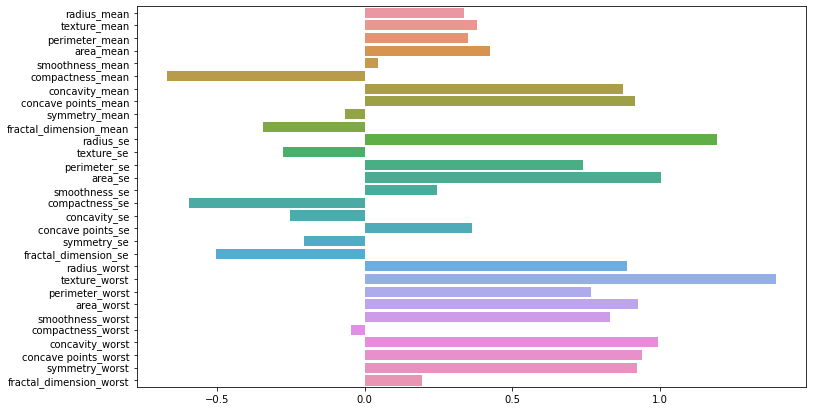

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(y = df.drop(['id', 'diagnosis'], axis = 1).columns, x = log_reg[-1].coef_[0])

## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=3, random_state=0))
rand_forest.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, random_state=0))])

In [25]:
rand_forest.score(X_train, y_train)

0.984375

In [26]:
rand_forest.score(X_test, y_test)

0.9473684210526315

### Feature Importance

<AxesSubplot:>

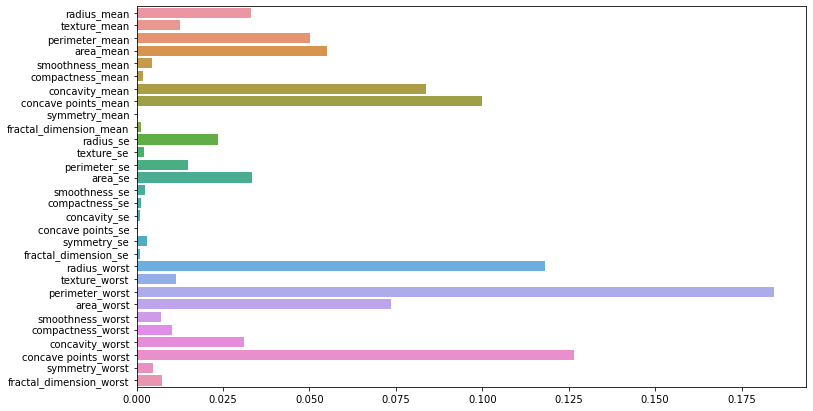

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(y = df.drop(['id', 'diagnosis'], axis = 1).columns, x = rand_forest[-1].feature_importances_)

## SVM

In [28]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

In [29]:
clf.score(X_train, y_train)

0.98828125

In [30]:
clf.score(X_test, y_test)

0.9649122807017544

### Feature Importance

<AxesSubplot:>

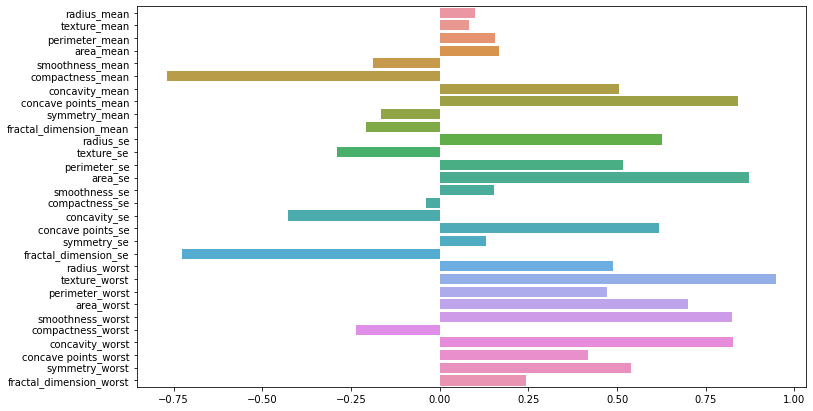

In [31]:
plt.figure(figsize=(12,7))
sns.barplot(y = df.drop(['id', 'diagnosis'], axis = 1).columns, x = clf[-1].coef_[0])

## ANN

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[-1], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, batch_size=10)

Epoch 1/20
52/52 [==============================] - 5s 23ms/step - loss: 0.5952 - accuracy: 0.7227 - val_loss: 0.4374 - val_accuracy: 0.8421
Epoch 2/20
52/52 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 0.7949 - val_loss: 0.3109 - val_accuracy: 0.9298
Epoch 3/20
52/52 [==============================] - 0s 7ms/step - loss: 0.3552 - accuracy: 0.8496 - val_loss: 0.2316 - val_accuracy: 0.9298
Epoch 4/20
52/52 [==============================] - 0s 7ms/step - loss: 0.2889 - accuracy: 0.8828 - val_loss: 0.1870 - val_accuracy: 0.9298
Epoch 5/20
52/52 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.9141 - val_loss: 0.1614 - val_accuracy: 0.9123
Epoch 6/20
52/52 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.90 - 0s 7ms/step - loss: 0.2275 - accuracy: 0.9062 - val_loss: 0.1453 - val_accuracy: 0.9123
Epoch 7/20
52/52 [==============================] - 0s 6ms/step - loss: 0.1994 - accuracy: 0.9238 - val_loss: 0.1357 

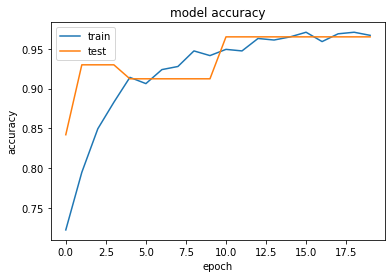

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()